In [1]:
import numpy as np

In [2]:
Test_c_grad=np.load('Test_c_grad.npy')
values=np.load('values.npy')
Test_c_grad=np.round(Test_c_grad*52)

In [3]:
Test_c_grad.shape

(2, 19, 18, 10, 19, 18)

In [4]:
np.max(Test_c_grad)

26.0

In [5]:
values.shape

(2, 19, 18)

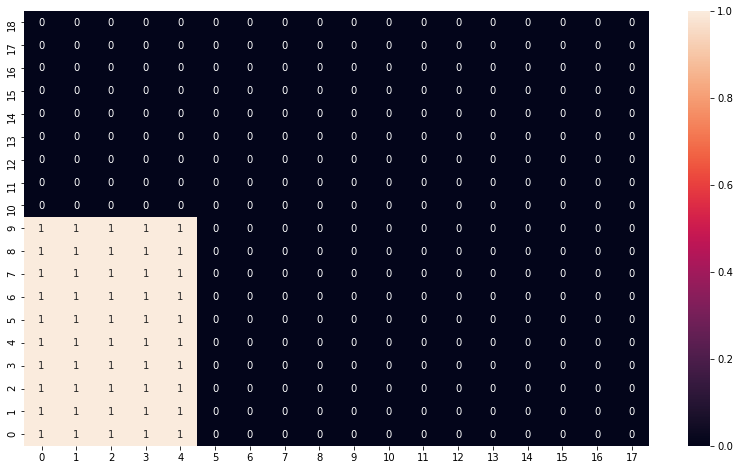

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#plt.figure(figsize=(8,8))
f, axs = plt.subplots(figsize=(14,8),nrows=1,ncols=1)
sns.heatmap(values[0],annot=True,ax=axs,fmt='g').invert_yaxis()

In [7]:
data=Test_c_grad[0,5,3,0]

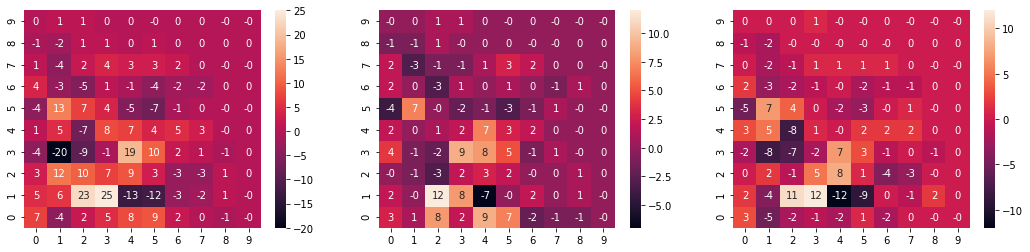

In [8]:
f, axs = plt.subplots(figsize=(18,4),nrows=1,ncols=3)
sns.heatmap(Test_c_grad[0,5,3,0][0:10,0:10],annot=True,ax=axs[0],fmt='g').invert_yaxis()
sns.heatmap(Test_c_grad[0,5,3,1][0:10,0:10],annot=True,ax=axs[1],fmt='g').invert_yaxis()
sns.heatmap(Test_c_grad[0,5,3,2][0:10,0:10],annot=True,ax=axs[2],fmt='g').invert_yaxis()

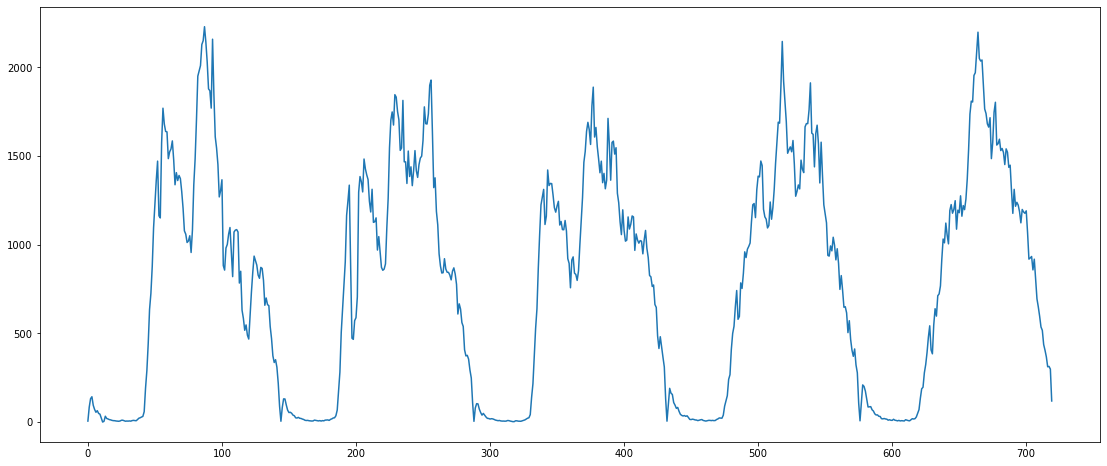

In [9]:
time_loss=np.load('time_loss.npy')
plt.figure(figsize=(19,8))
plt.plot(time_loss[0:720])

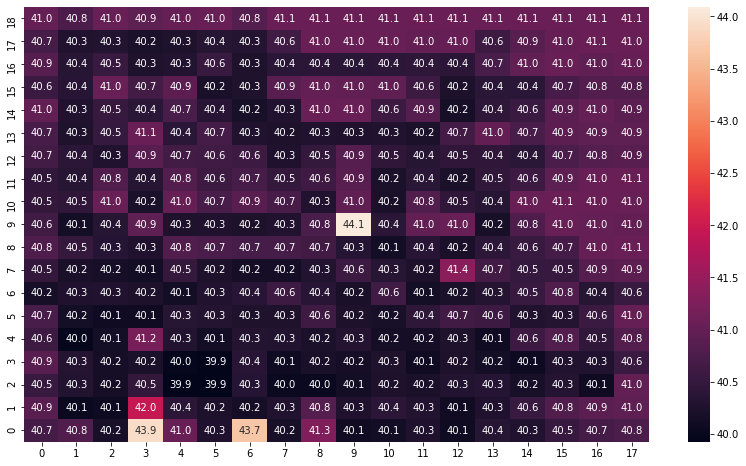

In [10]:
copy_loss=np.load('copy_loss.npy')

f, axs = plt.subplots(figsize=(14,8),nrows=1,ncols=1)
sns.heatmap(copy_loss,annot=True,ax=axs,fmt='.1f').invert_yaxis()

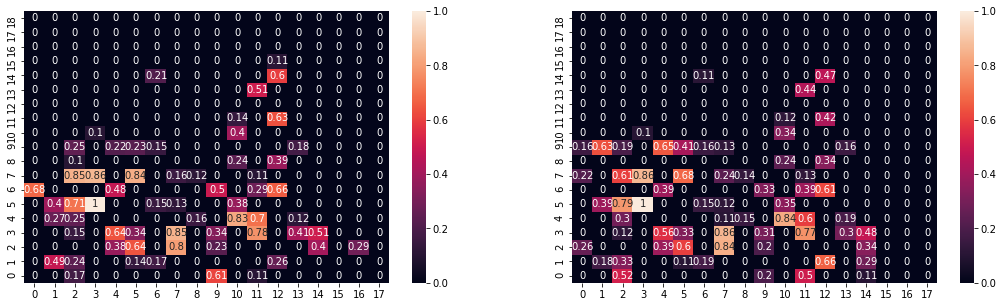

In [11]:
in_5_3_dtw=np.load('in_5_3_dtw.npy')
out_5_3_dtw=np.load('out_5_3_dtw.npy')
in_5_3_dtw[in_5_3_dtw<0.1]=0
out_5_3_dtw[out_5_3_dtw<0.1]=0
f, axs = plt.subplots(figsize=(18,5),nrows=1,ncols=2)
sns.heatmap(in_5_3_dtw,annot=True,ax=axs[0],fmt='.2g').invert_yaxis()
sns.heatmap(out_5_3_dtw,annot=True,ax=axs[1],fmt='.2g').invert_yaxis()

Text(0.5, 1.0, 'val_loss')

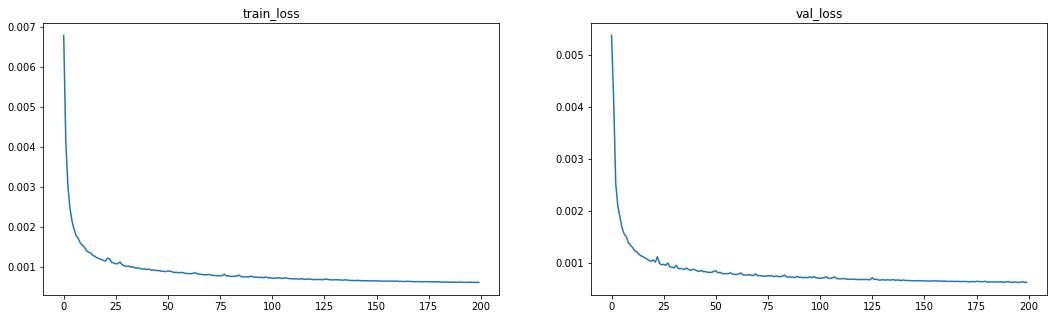

In [12]:
train_loss=np.load('train_loss.npy')
val_loss=np.load('val_loss.npy')
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(train_loss)
plt.title('train_loss')
plt.subplot(1,2,2)
plt.plot(val_loss)
plt.title('val_loss')

In [13]:
grad_loss=np.load('add_grad_loss.npy')
origin_loss=np.load('origin_loss.npy')

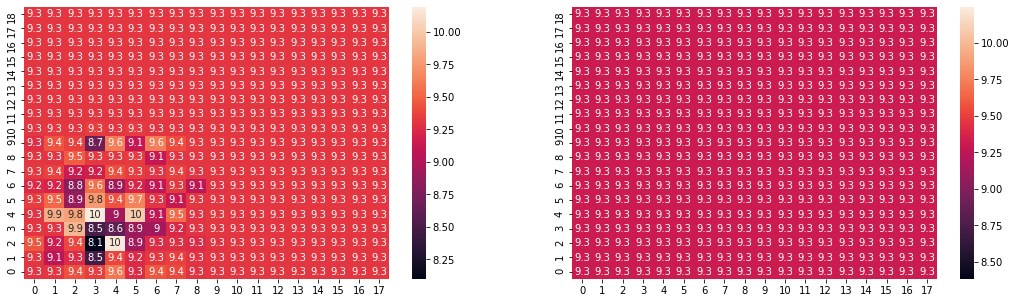

In [14]:
f, axs = plt.subplots(figsize=(18,5),nrows=1,ncols=2)
sns.heatmap(grad_loss*52,annot=True,ax=axs[0],fmt='.2g').invert_yaxis()
sns.heatmap(origin_loss*52,annot=True,ax=axs[1],fmt='.2g').invert_yaxis()

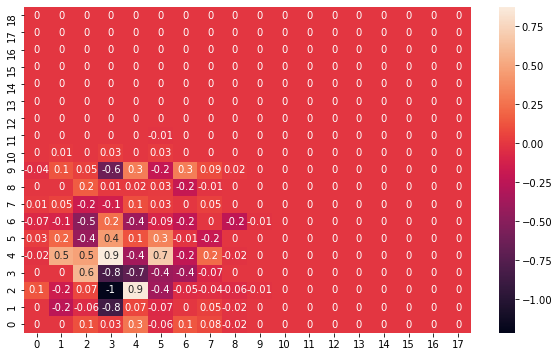

In [15]:
f, axs = plt.subplots(figsize=(10,6),nrows=1,ncols=1)
loss=(grad_loss-origin_loss)*52
loss[np.abs(loss)<0.01]=0
sns.heatmap(loss,annot=True,ax=axs,fmt='.1g').invert_yaxis()

In [16]:
all_od_7days=np.load('../data/all_od_7days.npy')

In [17]:
all_od_7days.shape

(5047, 342)

In [18]:
all_od_7days=all_od_7days.reshape(-1,19,18)

In [19]:
all_od_7days=np.sum(all_od_7days,axis=0)

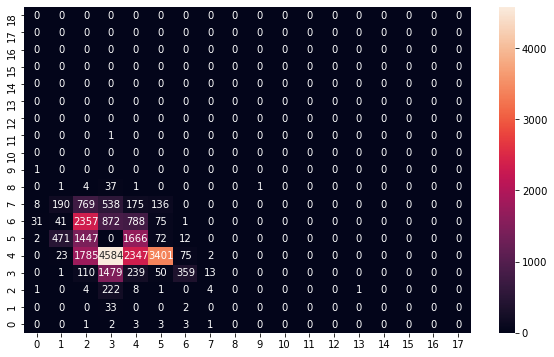

In [20]:
f, axs = plt.subplots(figsize=(10,6),nrows=1,ncols=1)
sns.heatmap(all_od_7days,annot=True,ax=axs,fmt='g').invert_yaxis()

In [21]:
import cv2
img = cv2.imread('../map.png', 1)
img = np.float32(cv2.resize(img, (785, 785))) / 255

In [22]:
import numpy as np
a=np.load('../guide_BP_result/in_corrcoef.npy')

In [23]:
a.shape

(19, 18, 19, 18)

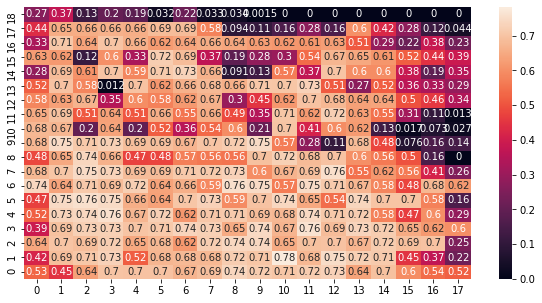

In [24]:
f, axs = plt.subplots(figsize=(10,5),nrows=1,ncols=1)
sns.heatmap(a[7,10],annot=True,ax=axs,fmt='.2g').invert_yaxis()

In [25]:
z=np.load('z_out.npy')

In [26]:
z=z*10
z[np.abs(z)<0.001]=0

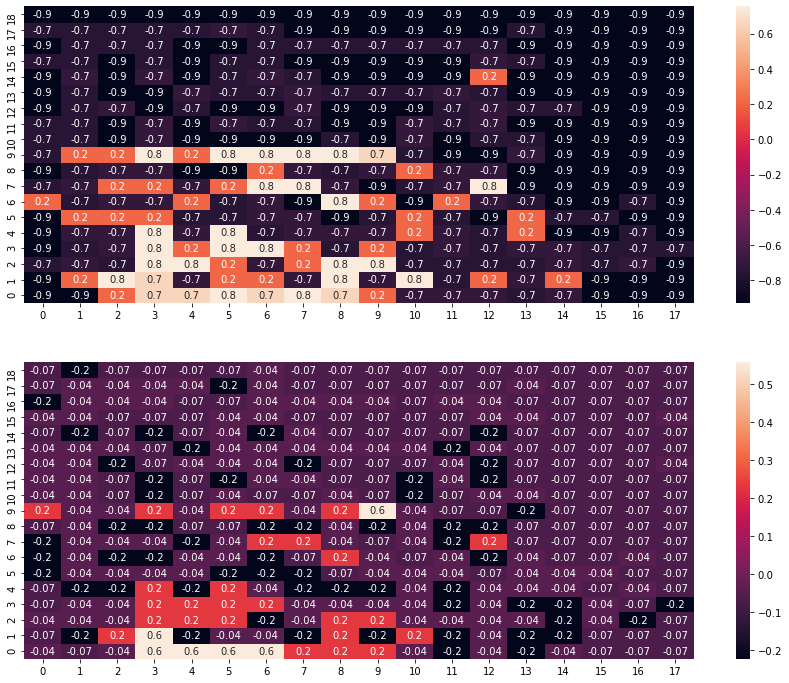

In [27]:
f, axs = plt.subplots(figsize=(15,12),nrows=2,ncols=1)
sns.heatmap(z[0],annot=True,ax=axs[0],fmt='.1g').invert_yaxis()
sns.heatmap(z[1],annot=True,ax=axs[1],fmt='.1g').invert_yaxis()

In [28]:
[np.min(z[0]),np.max(z[0])]

[-0.9287693351507187, 0.7540003955364227]

In [29]:
[np.min(z[1]),np.max(z[1])]

[-0.22239737212657928, 0.5566146969795227]

In [30]:
train_c=z[2:12]

In [31]:
train_c.shape

(10, 19, 18)

Text(0.5, 1.0, 'outflow')

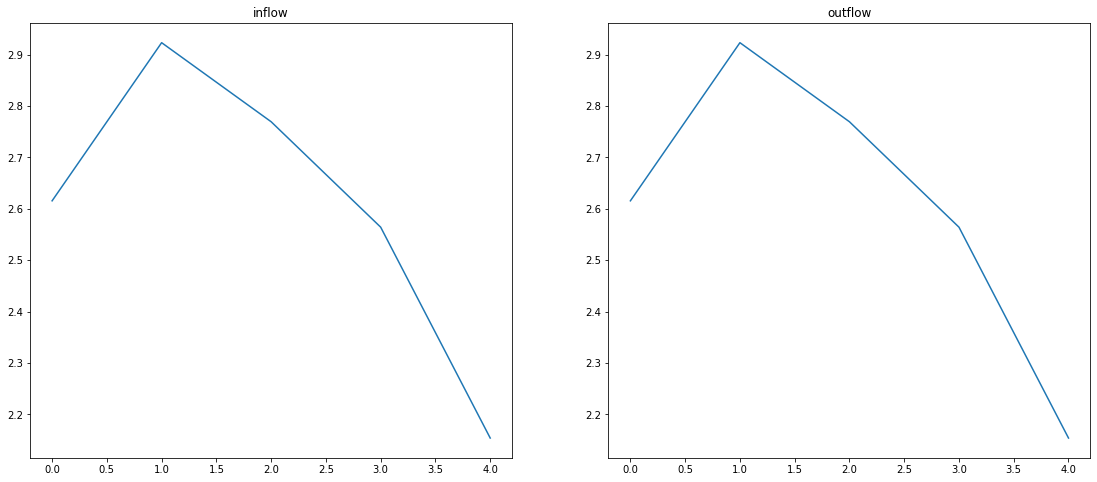

In [52]:
_in_=[]
_out_=[]
max_in=np.max(z[0])*1
max_out=np.max(z[1])*0.0
for x in range(3):
    for y in range(3):
        if z[0,x,y]>=max_in:
            j=0
            inflow=[]
            for i in range(5):
                inflow.append(train_c[j,x,y])
                j+=2
            _in_.append(inflow)
        if z[1,x,y]>max_out:
            j=0
            outflow=[]
            for i in range(5):
                outflow.append(train_c[j,x,y])
                j+=2
            _out_.append(outflow)
        
plt.figure(figsize=(19,8))
plt.subplot(1,  2,  1)
# 绘制第一个图像 
for i in range(len(_in_)):
    plt.plot(_in_[i]) 
plt.title('inflow')  
#将第二个 subplot 激活，并绘制第二个图像
plt.subplot(1,  2,  2) 
for i in range(len(_out_)):
    plt.plot(_out_[i]) 
plt.title('outflow')

Text(0.5, 1.0, 'outflow')

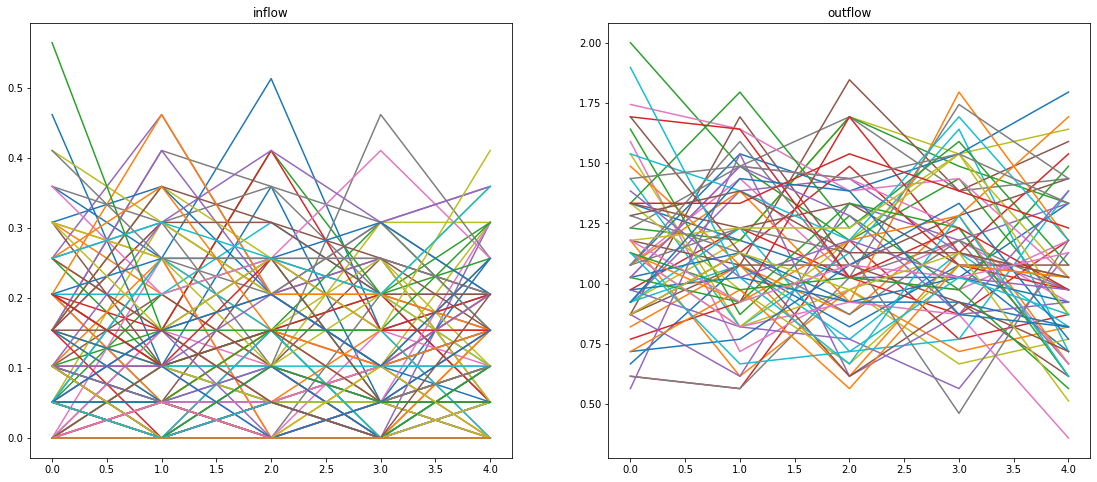

In [47]:
_in_=[]
_out_=[]
min_in=np.min(z[0])
min_out=np.min(z[1])*0.8
for x in range(19):
    for y in range(18):
        if z[0,x,y]<=min_in:
            j=0
            inflow=[]
            for i in range(5):
                inflow.append(train_c[j,x,y])
                j+=2
            _in_.append(inflow)
        if z[1,x,y]<min_out :
            j=1
            outflow=[]
            for i in range(5):
                outflow.append(train_c[j,x,y])
                j+=2
            _out_.append(outflow)
        
plt.figure(figsize=(19,8))
plt.subplot(1,  2,  1)
# 绘制第一个图像 
for i in range(len(_in_)):
    plt.plot(_in_[i]) 
plt.title('inflow')  
#将第二个 subplot 激活，并绘制第二个图像
plt.subplot(1,  2,  2) 
for i in range(len(_out_)):
    plt.plot(_out_[i]) 
plt.title('outflow')

In [34]:
label_1=(train_c[-1]-train_c[-3])*195
label_2=(train_c[-2]-train_c[-4])*195

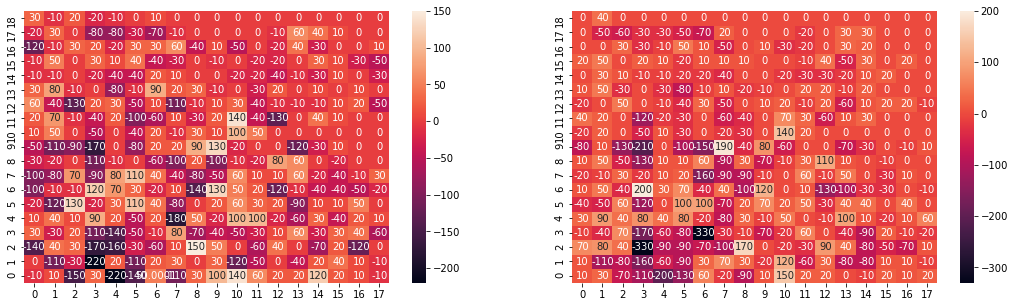

In [35]:
f, axs = plt.subplots(figsize=(18,5),nrows=1,ncols=2)
sns.heatmap(label_1,annot=True,ax=axs[0],fmt='g').invert_yaxis()
sns.heatmap(label_2,annot=True,ax=axs[1],fmt='g').invert_yaxis()

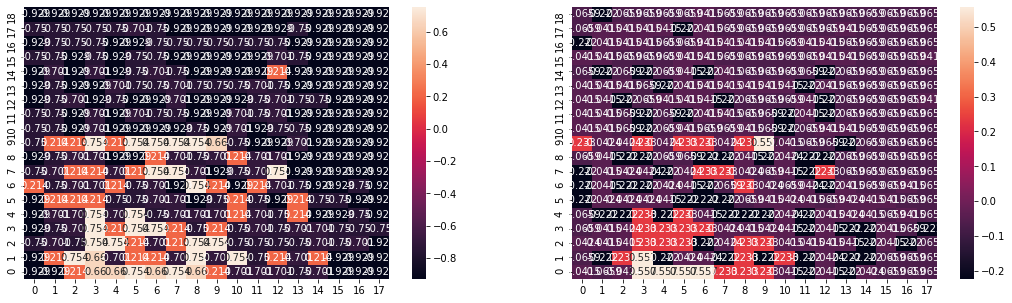

In [36]:
f, axs = plt.subplots(figsize=(18,5),nrows=1,ncols=2)
sns.heatmap(z[0],annot=True,ax=axs[0],fmt='.3g').invert_yaxis()
sns.heatmap(z[1],annot=True,ax=axs[1],fmt='.3g').invert_yaxis()

Text(0.5, 1.0, 'outflow')

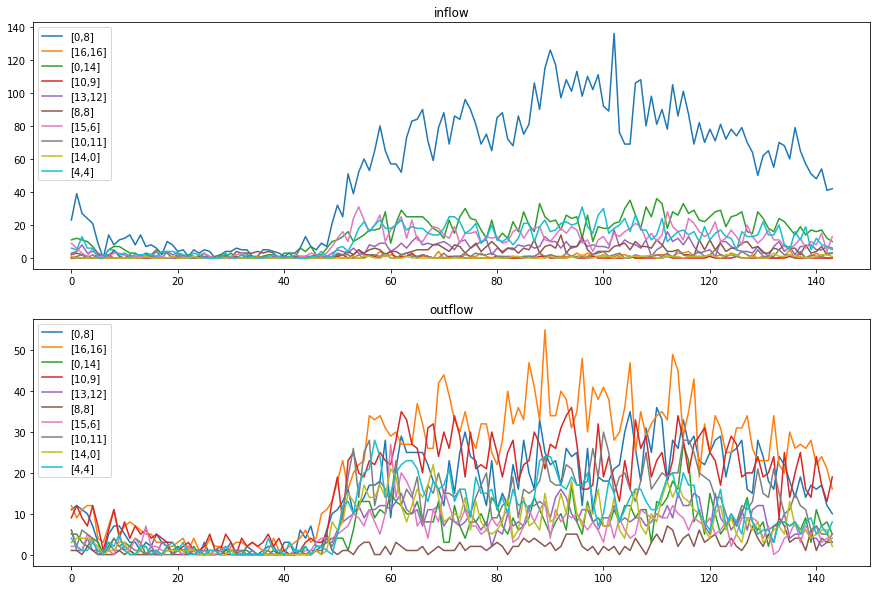

In [37]:
Train_c=np.load('Train_c.npy')
Train_c=Train_c*195
legend=[]
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
for i in range(10):
    i = np.random.randint(19)
    j = np.random.randint(18)
    plt.plot(Train_c[0:144,0,i,j])
    legend.append('['+str(i)+','+str(j)+']')
plt.legend(legend)
plt.title('inflow') 
plt.subplot(2,1,2)
for i in range(10):
    i = np.random.randint(19)
    j = np.random.randint(18)
    plt.plot(Train_c[0:144,0,i,j])
    legend.append('['+str(i)+','+str(j)+']')
plt.legend(legend)
plt.title('outflow')  

In [38]:
weight=np.load('weight.npy')

In [39]:
weight.shape

(2, 6)

Text(0.5, 1.0, 'outflows_weight')

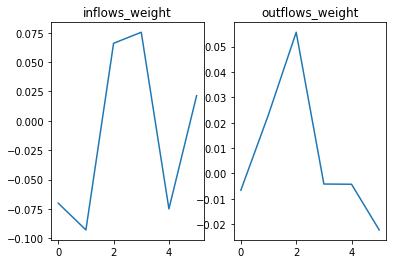

In [40]:
plt.subplot(1,2,1)
plt.plot(weight[0])
plt.title('inflows_weight')
plt.subplot(1,2,2)
plt.plot(weight[1])
plt.title('outflows_weight')

In [41]:
center=np.load('center.npy')

Text(0.5, 1.0, 'outflows_center')

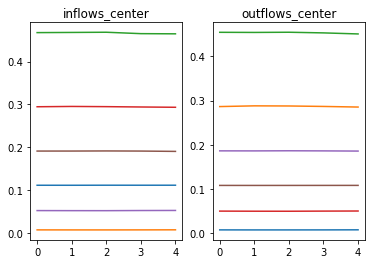

In [42]:
plt.subplot(1,2,1)
for i in range(center.shape[1]):
    plt.plot(center[0,i])
plt.title('inflows_center')
plt.subplot(1,2,2)
for i in range(center.shape[1]):
    plt.plot(center[1,i])
plt.title('outflows_center')

In [43]:
center

array([[[0.11167515, 0.11164693, 0.11177284, 0.11173669, 0.11176343],
        [0.00769705, 0.00762078, 0.00761062, 0.00769593, 0.0078372 ],
        [0.46731586, 0.46772142, 0.46818344, 0.46491369, 0.46449773],
        [0.29456992, 0.29530452, 0.29482196, 0.29403334, 0.29335845],
        [0.05265101, 0.05249327, 0.0524381 , 0.0527836 , 0.05295963],
        [0.19133543, 0.19136164, 0.19162482, 0.19133778, 0.19057446]],

       [[0.00768539, 0.00761405, 0.00761626, 0.00767121, 0.00783697],
        [0.28649264, 0.28812678, 0.28782994, 0.28679511, 0.28541447],
        [0.45439913, 0.45412663, 0.45455371, 0.45309079, 0.45071792],
        [0.0501445 , 0.04990758, 0.04983485, 0.05015697, 0.05036146],
        [0.18637119, 0.18627606, 0.1865539 , 0.18629811, 0.18587717],
        [0.10823224, 0.10818806, 0.10821969, 0.10825233, 0.10829125]]])

In [ ]:
reg.intercept_

In [ ]:
Train_c=np.load('../data/input_c_next.npy')
Train_c.shape

In [ ]:
input_c_next=np.load('../data/input_c_next.npy').reshape(-1,2,19,18)

In [ ]:
input_c_next.shape

In [ ]:
Train_c=np.load('Train_c.npy')
Train_c=Train_c*195
Train_c_next=np.load('../data/input_c_next.npy').reshape(-1,2,19,18)
Train_c_next=Train_c_next*195
predict=np.load('predict.npy')*195
plt.figure(figsize=(10,5))
i=np.random.randint(144)
x=np.random.randint(19)
y=np.random.randint(18)
legend=['origin','linear_predict','network_predict']
c=0
plt.plot(Train_c[c:c+144,9,x,y])
plt.plot(Train_c_next[c:c+144,1,x,y])
plt.plot(predict[c:c+144,1,x,y])
plt.legend(legend)
print(np.sum((Train_c[c:c+144,9,x,y]-Train_c_next[c:c+144,1,x,y])**2))
print(np.sum((Train_c[c:c+144,9,x,y]-predict[c:c+144,1,x,y])**2))

In [ ]:
loss1=

In [ ]:
Train_c.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

# plt.figure()
# plt.plot(z,'k+',label='noisy measurements')
# plt.plot(xhat,'b-',label='a posteri estimate')
# plt.axhline(x,color='g',label='truth value')
# plt.legend()
# plt.title('Estimate vs. iteration step', fontweight='bold')
# plt.xlabel('Iteration')
# plt.ylabel('Voltage')

# plt.figure()
# valid_iter = range(1,n_iter) # Pminus not valid at step 0
# plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
# plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
# plt.xlabel('Iteration')
# plt.ylabel('$(Voltage)^2$')
# plt.setp(plt.gca(),'ylim',[0,.01])
# plt.show()

In [ ]:
plt.plot(z)

In [ ]:
Train_c=np.load('Train_c.npy')
Train_c=Train_c*195
Train_c_next=np.load('../data/input_c_next.npy').reshape(-1,2,19,18)
Train_c_next=Train_c_next*195
predict=np.load('predict.npy')*195
plt.figure(figsize=(10,5))
i=np.random.randint(144)
x=np.random.randint(19)
y=np.random.randint(18)
c=40
legend=['origin','linear_predict','network_predict']
plt.plot(Train_c[c:c+6,9,x,y])
plt.plot(Train_c_next[c:c+6,1,x,y])
plt.plot(predict[c:c+6,1,x,y])
plt.legend(legend)
print(np.sum((Train_c[c:c+6,9,x,y]-Train_c_next[c:c+6,1,x,y])**2))
print(np.sum((Train_c[c:c+6,9,x,y]-predict[c:c+6,1,x,y])**2))

In [53]:
data=np.load('../data/all_data_30days_10min.npy')
data.shape

(4320, 2, 19, 18)

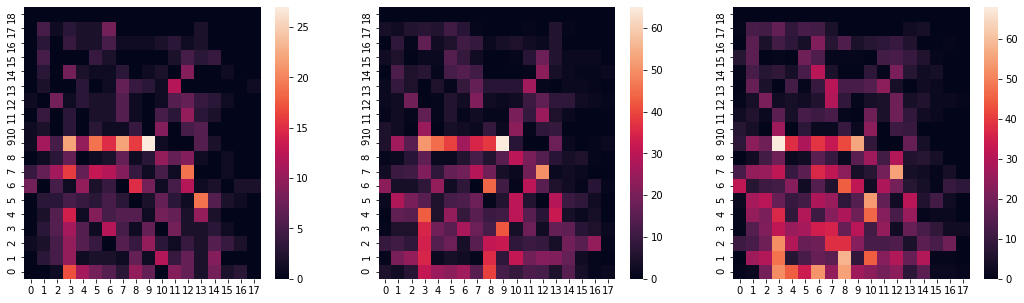

In [57]:
f, axs = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
svm=sns.heatmap(data[6*7,0],annot=False,ax=axs[0],fmt='.3g').invert_yaxis()
sns.heatmap(data[6*7+3,0],annot=False,ax=axs[1],fmt='.3g').invert_yaxis()
sns.heatmap(data[6*8,0],annot=False,ax=axs[2],fmt='.3g').invert_yaxis()

In [59]:
plt.savefig('save_as_a_png.png')

<Figure size 432x288 with 0 Axes>